importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


read the dataset

In [2]:
df=pd.read_csv("data/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


check no of rows and columns

In [4]:
df.shape

(1338, 7)

check missing values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check duplicates

In [6]:
df.duplicated().sum()

1

Handle duplicate values

In [7]:
df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# delete duplicate value
df = df.drop_duplicates()


In [9]:
# reset index after removal
df = df.reset_index(drop=True)


In [10]:
df.shape

(1337, 7)

Check datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Checking the number of unique values of each columns

In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Checking statistic of the dataset

In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Exploring data

In [14]:
print("Categories in 'sex' variable :  ",end=" ")
print(df['sex'].unique())
print("Categories in 'smoker' variable :  ",end=" ")
print(df['smoker'].unique())
print("Categories in 'region' variable :  ",end=" ")
print(df['region'].unique())

Categories in 'sex' variable :   ['female' 'male']
Categories in 'smoker' variable :   ['yes' 'no']
Categories in 'region' variable :   ['southwest' 'southeast' 'northwest' 'northeast']


In [16]:
# define numerical and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
# print columns
print("we have {} numerical features :{}".format(len(numeric_features),numeric_features))
print("\n we have {} categorical features :{}".format(len(categorical_features),categorical_features))

we have 4 numerical features :['age', 'bmi', 'children', 'charges']

 we have 3 categorical features :['sex', 'smoker', 'region']


Histogram and KDE

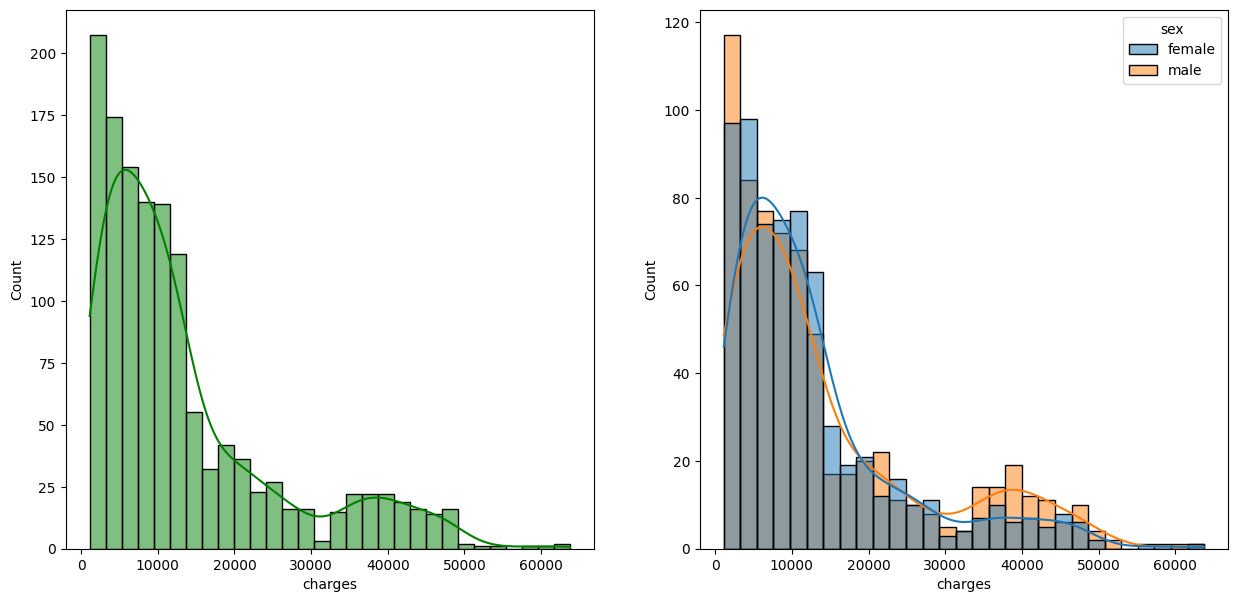

In [17]:
fig,aux=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='sex')
plt.show()

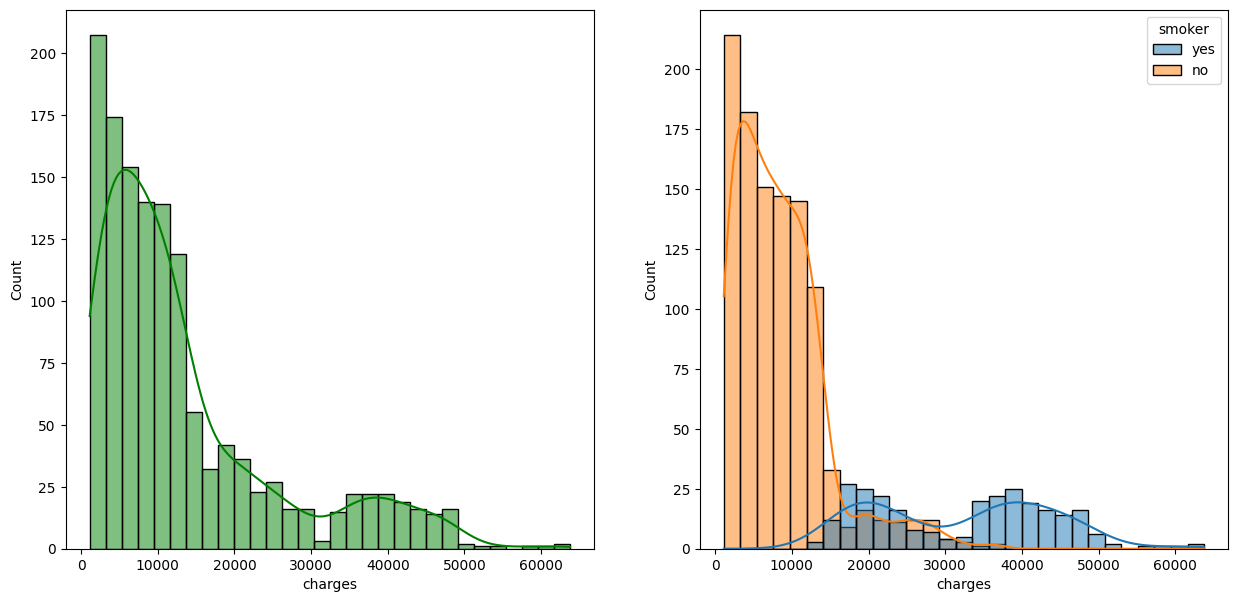

In [19]:
fig,aux=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='smoker')
plt.show()

Univariate Analysis (Distribution of Each Feature)

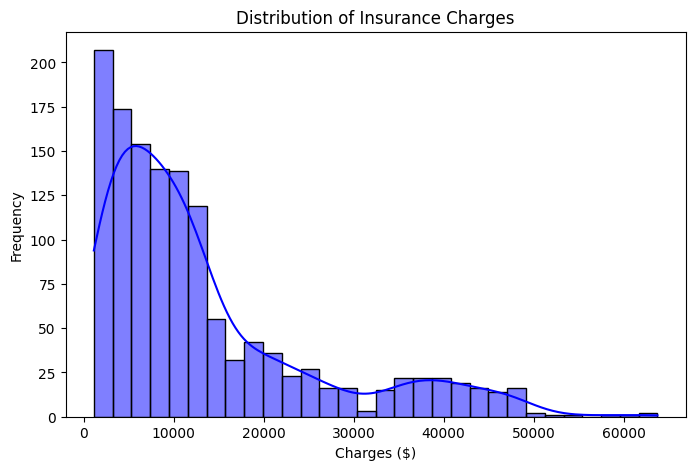

In [20]:
#Distribution of charges (Target Variable)
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], bins=30, kde=True, color="blue")
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges ($)")
plt.ylabel("Frequency")
plt.show()


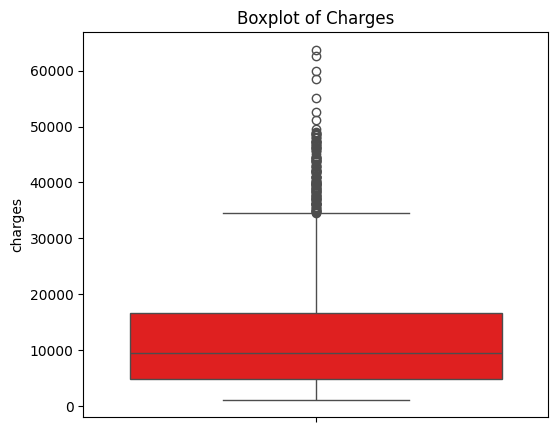

In [21]:
# Boxplot for charges (Detect Outliers)
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['charges'], color="red")
plt.title("Boxplot of Charges")
plt.show()


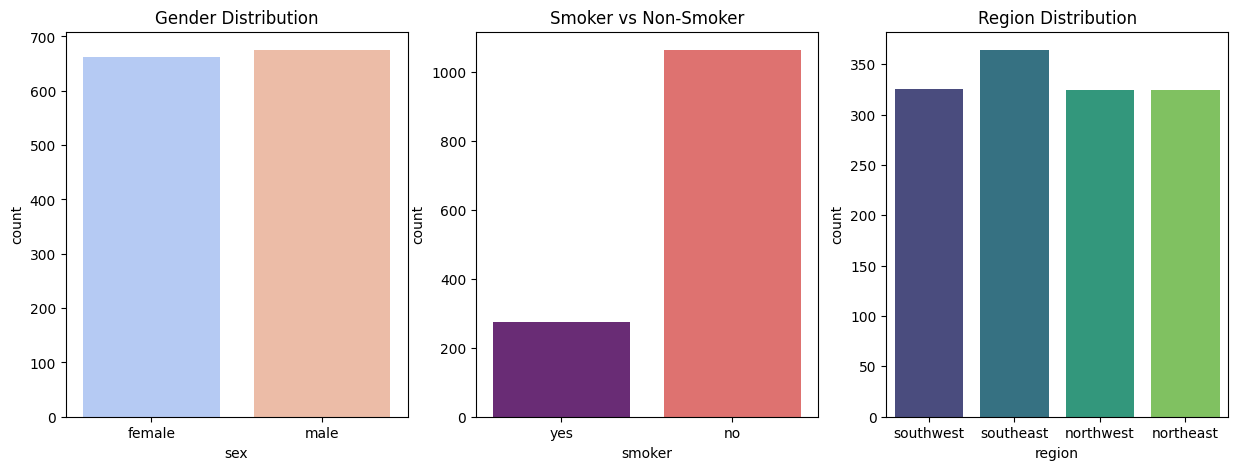

In [22]:
#  Countplot for Categorical Features (sex, smoker, region)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gender distribution
sns.countplot(x='sex', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Gender Distribution")

# Smoker distribution
sns.countplot(x='smoker', data=df, ax=axes[1], palette="magma")
axes[1].set_title("Smoker vs Non-Smoker")

# Region distribution
sns.countplot(x='region', data=df, ax=axes[2], palette="viridis")
axes[2].set_title("Region Distribution")

plt.show()


 Bivariate Analysis (Feature Relationships with charges)

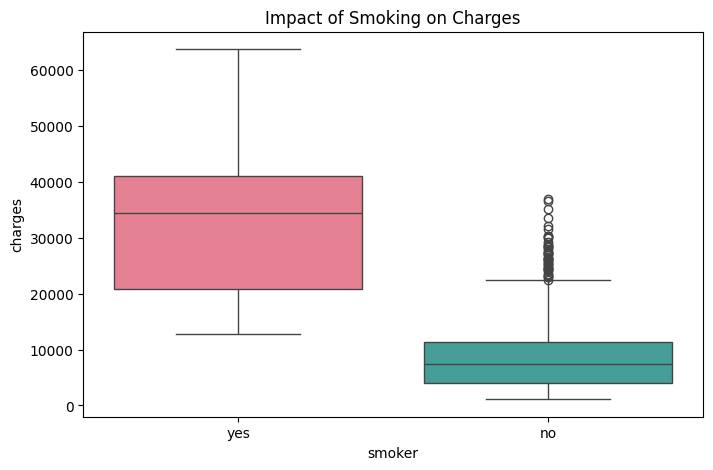

In [ ]:
# Boxplot: smoker vs. charges (Does smoking increase cost?)
# Smokers should have higher insurance charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df, palette="husl")
plt.title("Impact of Smoking on Charges")
plt.show()


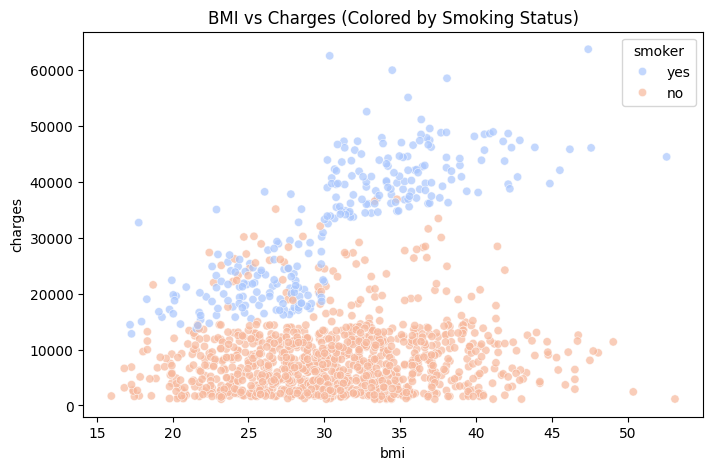

In [ ]:
# Scatter Plot: bmi vs charges (Does higher BMI increase cost?)
# Higher BMI correlates with higher costs, especially for smokers
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette="coolwarm", alpha=0.7)
plt.title("BMI vs Charges (Colored by Smoking Status)")
plt.show()


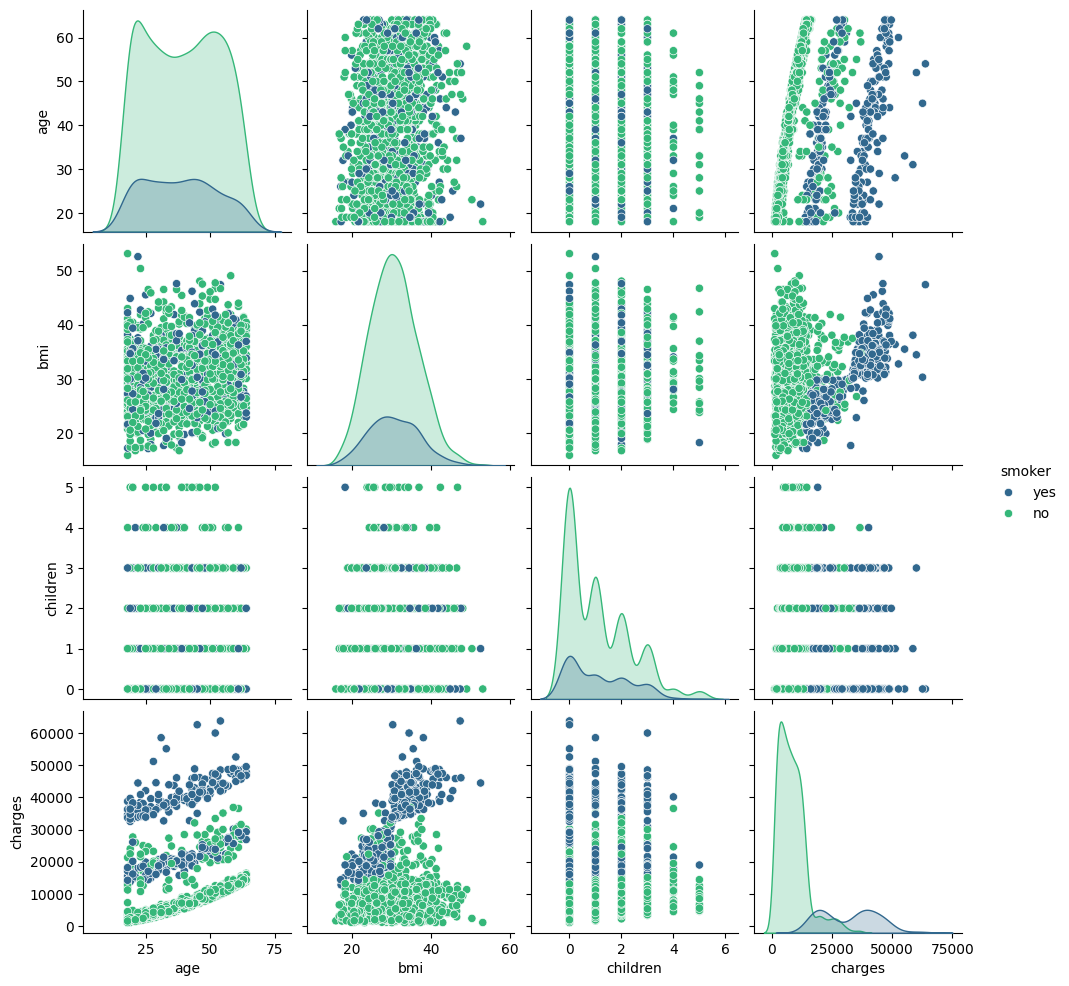

In [25]:
#  Pairplot for All Numerical Features
# Useful for detecting linear relationships
sns.pairplot(df, hue='smoker', palette="viridis")
plt.show()
